#Implement Multiple Regression model for Addition of Two Numbers Using Machine Learning with graphical User Interface.

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load the datasets
df=pd.read_csv("add.csv")

In [ ]:
# separate the features and target
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
# split the train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# create and train the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# define the function to plot and predict
def plot_and_predict(x1, x2):
    y_pred = lr.predict(pd.DataFrame({"x": [x1], "y": [x2]}))
    fig = plt.figure(figsize=(6, 6))

    ax2 = fig.add_subplot(121, projection='3d')
    ax2.scatter(df['x'], df['y'], df['sum'], c='r', marker='o', label='Actual data')
    ax2.scatter(x1, x2, y_pred, c='b', marker='x', s=100, label='Prediction')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('Y')
    ax2.set_title('Prediction for X1={}, X2={}'.format(x1, x2))

    plt.legend()
    plt.show()

    return y_pred

# plot_and_predict(10, 10)

In [ ]:
# calculate the accuracy of the model
accuracy=lr.score(x_test,y_test)
print(f"With an Accuracy of {accuracy}")

With an Accuracy of 1.0


In [ ]:
# gui integration
import ipywidgets as widgets
from IPython.display import display

header=widgets.HTML("<h3 style='text-align:center;border-bottom:1px solid grey;'>Addition of two numbers</h3>")
footer=widgets.HTML("<p style='text-align:center;'>© 211P011 - Multiple Regression Model</p>")
x1_input = widgets.FloatText(description='X1:')
x2_input = widgets.FloatText(description='X2:')
prediction_label=widgets.Label("Predicted sum is ")

predict_button = widgets.Button(description='Predict')

output = widgets.Output()
accuracy=widgets.Label("With an Accuracy of ")

def on_button_clicked(b):
  with output:
    output.clear_output(wait=True)
    x1 = x1_input.value
    x2 = x2_input.value
    y_pred = plot_and_predict(x1, x2)
    prediction_label.value = f"Predicted sum is: {y_pred[0]}"
    accuracy.value=f"With an Accuracy of {lr.score(x_test,y_test)*100}%"

predict_button.on_click(on_button_clicked)

top_row = widgets.HBox([widgets.VBox([x1_input,x2_input,predict_button, prediction_label,accuracy]), output],
                       layout=widgets.Layout(align_items='center', justify_content='center'))
main_layout = widgets.VBox([header, top_row, footer],
                            layout=widgets.Layout(align_items='center', justify_content='center'))

display(main_layout)


#**1. Implement a Multiple Linear Regression model with following:**

(a) Creating own dataset from sklearn.datasets import make_regression,

(b) Display 3D scatter plot of it.

(c) Train, Test and predict a model using LinearRegressiopn class.

(d) Find mean_absolute_error, mean_squared_error, r2_score.

(e) Draw a Grid on your scatter 3D plot.

(f) Find intercept and coefficient.

In [ ]:
#  Creating own dataset from sklearn.datasets import make_regression,
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
data['Target'] = y

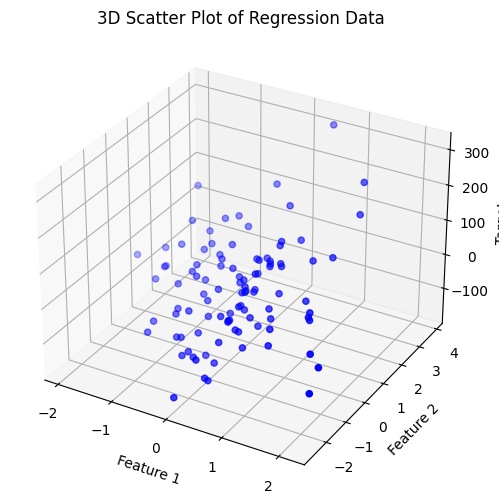

In [ ]:
#  Display 3D scatter plot of it.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Feature 1'], data['Feature 2'], data['Target'], c='b', marker='o')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title('3D Scatter Plot of Regression Data')
plt.show()

In [ ]:
# Train, Test and predict a model using LinearRegressiopn class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# Find mean_absolute_error, mean_squared_error, r2_score.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 0.08960994532576733
Mean Squared Error: 0.012384680824794976
R^2 Score: 0.9999982803305351


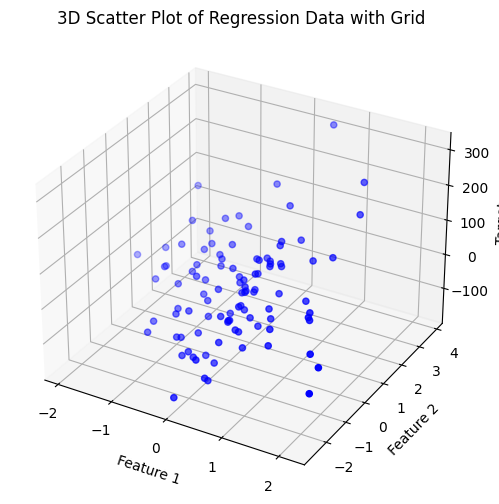

In [ ]:
# Draw a Grid on your scatter 3D plot.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Feature 1'], data['Feature 2'], data['Target'], c='b', marker='o')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.grid(True)
plt.title('3D Scatter Plot of Regression Data with Grid')
plt.show()


In [ ]:
# Find intercept and coefficient.
intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')


Intercept: 0.013037594527229857
Coefficients: [28.2063702  75.05481391 17.75432807]


#**Implement a Multiple Linear Regression model with following:**

(a) Load a dataset from sklearn.datasets import load_diabetes

(b) Train, Test and predict a model using LinearRegressiopn class.

(g) Find r2_score, intercept and coefficients.

(c) Make your own Linear Regression class and implement user defined function

def __init__(self), def fit(self,X_train,y_train), def predict(self,X_test). Fit and train,test model using this class. And also find r2_score, intercept and coefficients, thenverify results with inbuilt Regression class.

In [ ]:
#  Load a dataset from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
# Train, Test and predict a model using LinearRegressiopn class.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Find r2_score, intercept and coefficients.
r2 = r2_score(y_test, y_pred)
intercept = model.intercept_
coefficients = model.coef_

print(f"R2 Score: {r2}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


R2 Score: 0.4526027629719195
Intercept: 151.34560453985995
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [ ]:
# Make your own Linear Regression class and implement user defined function
class CustomLinearRegression:
    def __init__(self):
        self.intercept_ = None
        self.coefficients_ = None

    def fit(self, X_train, y_train):
        X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        self.coefficients_ = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
        self.intercept_ = self.coefficients_[0]
        self.coefficients_ = self.coefficients_[1:]

    def predict(self, X_test):
        X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        return X_b @ np.r_[self.intercept_, self.coefficients_]

custom_model = CustomLinearRegression()
custom_model.fit(X_train, y_train)
y_custom_pred = custom_model.predict(X_test)

custom_r2 = r2_score(y_test, y_custom_pred)
custom_intercept = custom_model.intercept_
custom_coefficients = custom_model.coefficients_

print(f"Custom Model R2 Score: {custom_r2}")
print(f"Custom Model Intercept: {custom_intercept}")
print(f"Custom Model Coefficients: {custom_coefficients}")


Custom Model R2 Score: 0.4526027629719198
Custom Model Intercept: 151.34560453986003
Custom Model Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
